In [128]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn.apionly as sns

terror = "Terrorism.csv"
df = pd.read_csv(terror, encoding = "Latin")


df2 = df[["iyear","imonth", "country_txt", "region_txt", "city", "attacktype1_txt", "targtype1_txt","nkill","nwound"]]


renamed_df = df2.rename(columns={"iyear": "Year","imonth": "Month", "country_txt": "Country", 
                "region_txt":"Region", "city":"City", "attacktype1_txt": "Attack Type",
                "targtype1_txt":"Target Type","nkill":"Number Killed","nwound":"Number Wounded"})
renamed_df['Year'] = renamed_df['Year'].astype(str)
renamed_df['Month'] = renamed_df['Month'].astype(str)
renamed_df.dtypes

C:\Users\khyman003\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (61,63,79,114,115) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Year               object
Month              object
Country            object
Region             object
City               object
Attack Type        object
Target Type        object
Number Killed     float64
Number Wounded    float64
dtype: object

In [63]:
terror = renamed_df.groupby(["Region"]).count()
terroryear = terror.groupby(["Year"])
terroryear.head()


,Year,Month,Country,City,Attack Type,Target Type,Number Killed,Number Wounded
Region,,,,,,,,
Australasia & Oceania,46,46,46,46,46,46,46,45
Central America & Caribbean,28,28,28,28,28,28,28,27
Central Asia,62,62,62,62,62,62,62,62
East Asia,105,105,105,105,105,105,100,98
Eastern Europe,2228,2228,2228,2228,2228,2228,2128,2098
Middle East & North Africa,29839,29839,29839,29839,29839,29839,28360,27541
North America,342,342,342,342,342,342,342,342
South America,1105,1105,1105,1105,1105,1105,1091,1084
South Asia,25067,25067,25067,25067,25067,25067,24362,23914


In [64]:
#Break up dataframes by year
FY2012DF  = renamed_df.loc[renamed_df["Year"] == "2012", :]
FY2013DF  = renamed_df.loc[renamed_df["Year"] == "2013", :]
FY2014DF  = renamed_df.loc[renamed_df["Year"] == "2014", :]
FY2015DF  = renamed_df.loc[renamed_df["Year"] == "2015", :]
FY2016DF  = renamed_df.loc[renamed_df["Year"] == "2016", :]
FY2017DF  = renamed_df.loc[renamed_df["Year"] == "2017", :]


#Group by region and count how many attacks that year
Region2012 = FY2012DF.groupby(["Region"]).count()
Region2013 = FY2013DF.groupby(["Region"]).count()
Region2014 = FY2014DF.groupby(["Region"]).count()
Region2015 = FY2015DF.groupby(["Region"]).count()
Region2016 = FY2016DF.groupby(["Region"]).count()
Region2017 = FY2017DF.groupby(["Region"]).count()


#pull out one column count to plot.
Chart2012 = Region2012[["Year"]]
Chart2013 = Region2013[["Year"]]
Chart2014 = Region2014[["Year"]]
Chart2015 = Region2015[["Year"]]
Chart2016 = Region2016[["Year"]]
Chart2017 = Region2017[["Year"]]

Combined = pd.merge(Chart2012, Chart2013, on="Region")
CombinedRename = Combined.rename(columns = {"Year_x": "2012", "Year_y": "2013"})

Combined2 = pd.merge(CombinedRename, Chart2014, on="Region")
Combined2Rename = Combined2.rename(columns = {"Year":"2014"})

Combined3 = pd.merge(Combined2Rename, Chart2015, on="Region")
Combined3Rename = Combined3.rename(columns = {"Year":"2015"})

Combined4 = pd.merge(Combined3Rename, Chart2016, on="Region")
Combined4Rename = Combined4.rename(columns = {"Year":"2016"})

Combined5 = pd.merge(Combined4Rename, Chart2017, on="Region")
Combined5Rename = Combined5.rename(columns = {"Year":"2017"})
Combined5Rename

,2012,2013,2014,2015,2016,2017
Region,,,,,,
Central America & Caribbean,1,14,5,1,3,4
Central Asia,12,7,9,10,17,7
East Asia,4,15,43,28,8,7
Eastern Europe,173,165,962,684,134,110
Middle East & North Africa,2409,4560,6939,6036,6115,3780
North America,39,32,37,62,75,97
South America,133,182,283,176,159,172
South Asia,3803,4612,4998,4585,3639,3430
Southeast Asia,587,1188,1082,1072,1077,1020


In [65]:
#Middle East Chart
MiddleEast = Combined5Rename.iloc[4,:]
Africa = Combined5Rename.iloc[9, :]

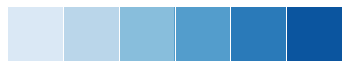

In [92]:
sns.palplot(sns.color_palette("Blues"))

C:\Users\khyman003\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\plotting\_core.py:194: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  warnings.warn(("'colors' is being deprecated. Please use 'color'"


Text(0.5,1,'Middle East/North Africa')

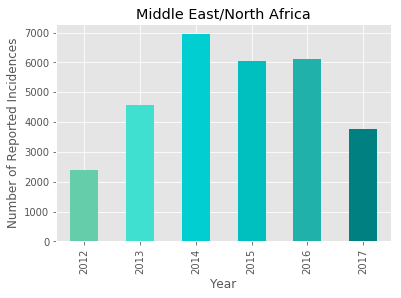

In [129]:

MEbarchart = MiddleEast.plot(kind='bar', colors = ["mediumaquamarine","turquoise",
                             "darkturquoise","c","lightseagreen","teal"])

#MEbarchart.set_color_cycle(sns.color_palette("coolwarm_r",6))



# Set the xlabel and ylabel using class methods

MEbarchart.set_xlabel("Year")
MEbarchart.set_ylabel("Number of Reported Incidences")
MEbarchart.set_title("Middle East/North Africa")



C:\Users\khyman003\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\plotting\_core.py:194: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  warnings.warn(("'colors' is being deprecated. Please use 'color'"


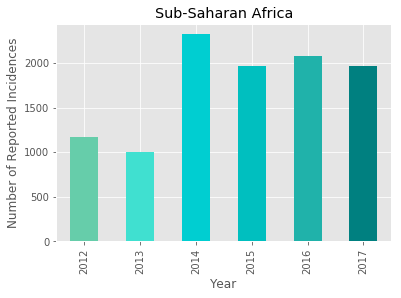

In [130]:

africabarchart = Africa.plot(kind='bar',colors = ["mediumaquamarine","turquoise",
                             "darkturquoise","c","lightseagreen","teal"])
africabarchart.set_xlabel("Year")
africabarchart.set_ylabel("Number of Reported Incidences")
africabarchart.set_title("Sub-Saharan Africa")

africabarchart